In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as xgc
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

# 数据准备

In [4]:
df = pd.read_csv('bonddata_8feature.csv')
# df

In [5]:
df_nan = df.dropna(axis = 0,how = 'any')
df_nan

,Liscd,Accper,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,EPS,Debt to Asset Ratio,Equity Ratio
34,110017,30/6/2017,0,1.186464,0.479689,0.083304,0.134980,0.017112,0.21,0.548178,0.451822
35,110018,30/6/2017,0,0.240056,0.615835,0.104523,0.149708,0.010165,0.09,0.734545,0.265404
36,110020,30/6/2017,0,1.623174,0.066159,0.170575,0.308543,0.021448,0.08,0.236495,0.763505
37,110020,31/12/2017,0,2.008228,0.099393,0.370714,0.657101,0.049055,0.17,0.247186,0.752814
38,110022,30/6/2017,0,2.978457,0.079166,0.378506,3.802738,0.067676,0.44,0.324041,0.675959
...,...,...,...,...,...,...,...,...,...,...,...
84243,197711,31/12/2021,0,2.501382,0.463034,0.059165,1.082079,0.007436,1.38,0.648554,0.351446
84258,197743,31/12/2021,0,2.501382,0.463034,0.059165,1.082079,0.007436,1.38,0.648554,0.351446
84309,197858,31/12/2021,0,2.501382,0.463034,0.059165,1.082079,0.007436,1.38,0.648554,0.351446
84311,197860,31/12/2021,0,1.459908,0.570691,0.093663,2.627991,0.008118,0.10,0.697334,0.302666


In [6]:
df2 = df_nan.sort_values(by = 'Accper',ascending = True)
df2['Default'].value_counts()

0    8074
1     555
Name: Default, dtype: int64

In [9]:
X = df2.drop(columns = ['Default','Liscd','Accper'])
y = df2['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False) 

print('X_train.shape:', X_train.shape)
print('X_tset.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (6903, 8)
X_tset.shape: (1726, 8)
y_train.shape: (6903,)
y_test.shape: (1726,)


# 线性回归

In [13]:
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train,y_train)

y_pred_LR = model_LR.predict(X_test)
y_pred_LR = y_pred_LR.astype(np.int64)

In [12]:
score_re = accuracy_score(y_pred_LR,y_test)
print(score_re)

0.9507531865585168


# 决策树模型

In [14]:
model_DT = DecisionTreeClassifier(max_depth = 5)
model_DT.fit(X_train,y_train)

y_pred_DT = model_DT.predict(X_test)
score_DT = accuracy_score(y_pred_DT,y_test)
print('score_DecisionTreeClassifier:',score_DT)

score_DecisionTreeClassifier: 0.9449594438006953


In [15]:
features_DT = X_train.columns 
importances_DT = model_DT.feature_importances_ 
importances_dt_df = pd.DataFrame()
importances_dt_df['特征名称'] = features_DT
importances_dt_df['特征重要性'] = importances_DT
importances_dt_df.sort_values('特征重要性',ascending = False)

,特征名称,特征重要性
4,Rate of Return on Total Assets,0.300456
2,Total Assets Turnover,0.207932
3,Fixed Assets Turnover,0.127487
6,Debt to Asset Ratio,0.089590
7,Equity Ratio,0.087424
5,EPS,0.076156
0,Current Ratio,0.062875
1,Debt-to-Long Capital Ratio,0.048080


# 主成分分析

In [16]:
pca = decomposition.PCA(n_components = 'mle')
pca.fit(X_train)

X_mle = pca.transform(X_train)
# X_re_mle

In [17]:
# pca.explained_variance_

In [18]:
pca.explained_variance_ratio_.sum()

1.0

# XGboost模型

In [19]:
model_XGB = xgb.XGBClassifier(eval_metric=['logloss','auc','error'], use_label_encoder=False)
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [20]:
y_pred_XGB = model_XGB.predict(X_test)
score = accuracy_score(y_pred_XGB,y_test)
print(score)

0.9484356894553881


In [21]:
digraph_XGB = xgb.to_graphviz(model_XGB, num_trees=0)    
digraph_XGB.format = 'png'
digraph_XGB.view('./XGBoost_8特征01')

'.\\XGBoost_8特征01.png'

In [22]:
y_pred_proba = model_XGB.predict_proba(X_test)
b = pd.DataFrame(y_pred_proba,columns = ['stay','left'])
print(b)

          stay      left
0     0.989420  0.010580
1     0.989237  0.010763
2     0.999017  0.000983
3     0.055136  0.944864
4     0.999000  0.001000
...        ...       ...
1721  0.997266  0.002734
1722  0.983493  0.016507
1723  0.999952  0.000048
1724  0.999952  0.000048
1725  0.999952  0.000048

[1726 rows x 2 columns]


In [23]:
confusion_matrix(y_test,y_pred_XGB)

array([[1623,   18],
       [  71,   14]], dtype=int64)

In [24]:
fpr,tpr,thres = roc_curve(y_test,y_pred_proba[:,1])
a = pd.DataFrame()
a['阈值'] = list(thres)
a['假正率'] = list(fpr)
a['真正率'] = list(tpr)
a

,阈值,假正率,真正率
0,1.986281,0.000000,0.000000
1,0.986281,0.000000,0.011765
2,0.960539,0.000000,0.035294
3,0.944864,0.001828,0.058824
4,0.912166,0.003047,0.058824
...,...,...,...
446,0.000021,0.989640,1.000000
447,0.000016,0.993906,1.000000
448,0.000015,0.996953,1.000000
449,0.000013,0.997562,1.000000


In [25]:
score1 = roc_auc_score(y_test,y_pred_proba[:,1])
print(score1)

0.8899093092447217


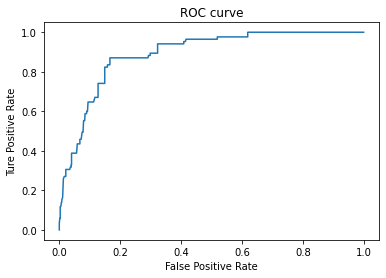

In [26]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.show()

In [27]:
features_XGB = X_train.columns #获取特征名称
importances_XGB = model_XGB.feature_importances_ #获取特征重要性
importances_xg_df = pd.DataFrame()
importances_xg_df['特征名称'] = features_XGB
importances_xg_df['特征重要性'] = importances_XGB
importances_xg_df.sort_values('特征重要性',ascending = False).head(10)

,特征名称,特征重要性
5,EPS,0.159634
6,Debt to Asset Ratio,0.142429
7,Equity Ratio,0.140780
0,Current Ratio,0.118241
2,Total Assets Turnover,0.118086
3,Fixed Assets Turnover,0.108126
4,Rate of Return on Total Assets,0.107931
1,Debt-to-Long Capital Ratio,0.104773


# 参数调优

In [34]:
def trainBestParameter(X_train, y_train,other_params):
    cv_params = {'n_estimators': [100,200,300,400,500], 
                 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                 'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.13, 0.15, 0.17,0.2]}  
    model = xgb.XGBClassifier(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', verbose=10, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['n_estimators'] = optimized_GBM.best_params_['n_estimators']
    other_params['max_depth']=optimized_GBM.best_params_['max_depth']
    other_params['learning_rate']=optimized_GBM.best_params_['learning_rate']
    
    return other_params

In [37]:
other_params = {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 
                'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 
                'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 
                'reg_lambda': 1, 'eval_metric':['logloss','auc','error'], 
                'use_label_encoder':False}
best_params = trainBestParameter(X_train, y_train, other_params)#参数调优

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   42.9s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   50.1s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  1.9min
[Parallel(

In [38]:
print(best_params)

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 7, 'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 'reg_lambda': 1, 'eval_metric': ['logloss', 'auc', 'error'], 'use_label_encoder': False}


In [39]:
model_best = xgb.XGBClassifier(**best_params)    
model_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric=['logloss', 'auc', 'error'],
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [40]:
y_pred = model_best.predict(X_test)
score_XGBoost = accuracy_score(y_pred,y_test)
print('score_XGBoost:', score_XGBoost)

score_XGBoost: 0.9466975666280417


In [33]:
y_pred_proba = model_best.predict_proba(X_test)
y_pred_proba[:,1]
fpr1,tpr1,thre1 = roc_curve(y_test,y_pred_proba[:,1])

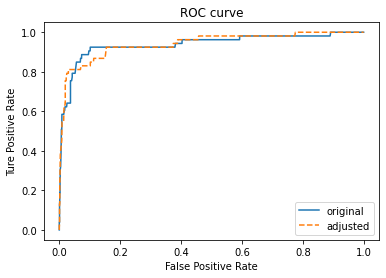

In [34]:
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1,linestyle = '--')
plt.title('ROC curve')
plt.legend(['original','adjusted'])
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.show()

In [35]:
digraph_best = xgb.to_graphviz(model_best, num_trees=0)    
digraph_best.format = 'png'
digraph_best.view('./XGBoost_best')

'.\\XGBoost_best.png'